In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from numpy.linalg import pinv

import mdpy as mdp

In [46]:
# Define the problem
ns = 8
I = np.eye(ns)
states = [i for i in range(ns)]

# Gamma matrix
gm = np.ones(ns)*0.9
gm[0] = 0
G = np.diag(gm)

# Lambda matrix
lm = np.ones(ns)*1.0
L = np.diag(lm)

# Feature matrix
X = np.identity(ns)
ivec = np.ones(ns)

# Target policy transitions
P_pi = np.diag(np.ones(ns-1), 1)
P_pi[-1][0] = 1

# Behavior policy transitions
P_mu = np.array(
        [mdp.someones(ns, i+1) for i in range(0, ns//2)] + 
        [mdp.someones(ns, 0, i+1)*0.5 for i in range(ns//2, ns-1)] + 
        [mdp.someones(ns, 0)])


r_pi = mdp.someones(ns, -1)
r_mu = mdp.someones(ns, -1)*0.5

In [47]:
P_pi

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [48]:
print(mdp.stationary(P_pi))

[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125]


In [49]:
P_mu

array([[ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [50]:
mdp.stationary(P_mu)

array([ 0.17021277,  0.17021277,  0.17021277,  0.17021277,  0.17021277,
        0.08510638,  0.04255319,  0.0212766 ])

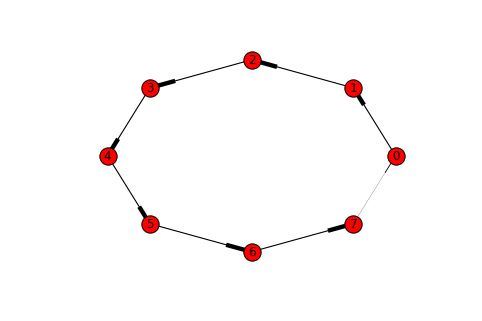

In [51]:
G_pi = nx.DiGraph(P_pi @ G + 0.2*P_pi)
edge_weights = [i[-1] for i in G_pi.edges(data='weight')]
nx.draw_circular(G_pi, with_labels=True, edge_cmap=plt.cm.Blues, width=edge_weights)

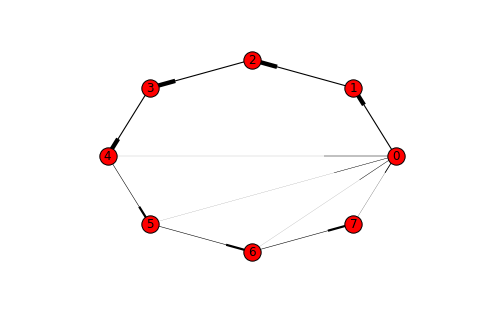

In [52]:
G_mu = nx.DiGraph(P_mu @ G + 0.2*P_mu)
edge_weights = [i[-1] for i in G_mu.edges(data='weight')]
nx.draw_circular(G_mu, with_labels=True, edge_cmap=plt.cm.Blues, width=edge_weights)

In [53]:
def draw_graph(pmat, gmat=None, **kwargs):
    """Draw representations of the MDP's transitions."""
    if gmat is None:
        gmat = np.eye(len(pmat))
    graph = nx.DiGraph(pmat @ gmat + 0.2*pmat)
    edge_weights = [i[-1] for i in graph.edges(data='weight')]
    options = dict( 
        edge_cmap=plt.cm.Blues,
        node_size = 500,
        width=edge_weights,
        with_labels=True,
    )
    options.update(**kwargs)
    nx.draw_circular(graph, **options)

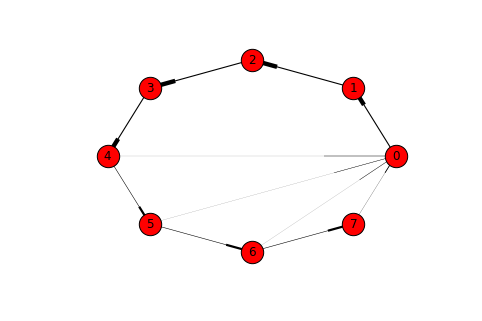

In [54]:
draw_graph(P_mu, G)

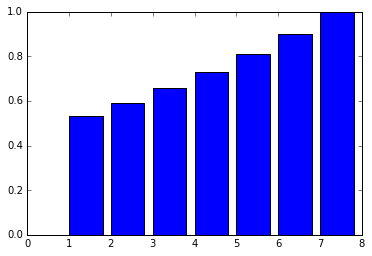

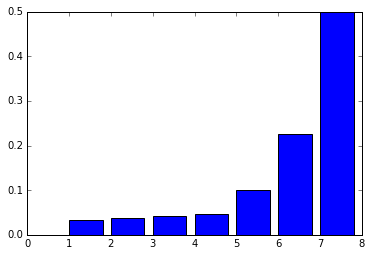

In [55]:
v_pi = mdp.bellman(P_pi, G, r_pi)
v_mu = mdp.bellman(P_mu, G, r_mu)

plt.bar(states, v_pi)
plt.show()
plt.bar(states, v_mu)
plt.show()

<Container object of 8 artists>

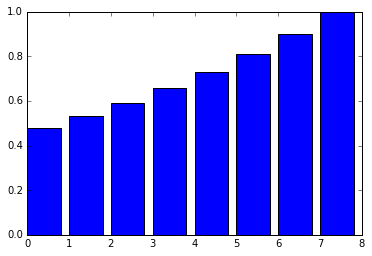

In [56]:
v_pi_td = mdp.td_solution(P_pi, G, L, X, r_pi)

plt.bar(states, v_pi_td)

<Container object of 8 artists>

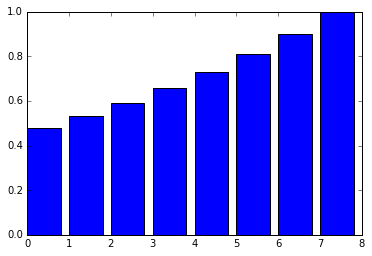

In [57]:
v_pi_etd = mdp.etd_solution(P_pi, G, L, X, ivec, r_pi)

plt.bar(states, v_pi_etd)

In [44]:
gtd = {'beta': 0.0063-0.0016, 'alpha': 0.1}
gtd2 = {'beta': 0.02, 'alpha': 0.1}
tdc = {'alpha': 0.1, 'beta': 0.01}